In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

In [20]:
df = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + "/data/product-rating.csv")

In [21]:
df.head()

,"<html lang=en><meta charset=utf-8><meta name=viewport content=""initial-scale=1",minimum-scale=1,"width=device-width""><title>Error 400 (Bad Request)!!1</title><style nonce=""UuvcRJY0urKIcWgXaVd85g"">*{margin:0;padding:0}html",code{font:15px/22px arial,"sans-serif}html{background:#fff;color:#222;padding:15px}body{color:#222;text-align:unset;margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px;}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}pre{white-space:pre-wrap;}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-border-image:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) 0}}@media only screen and (-webkit-min-device-pixel-ratio:2){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat;-webkit-background-size:100% 100%}}#logo{display:inline-block;height:54px;width:150px}</style><main id=""af-error-container"" role=""main""><a href=//www.google.com><span id=logo aria-label=Google role=img></span></a><p><b>400.</b> <ins>That’s an error.</ins><p>The server cannot process the request because it is malformed. It should not be retried. <ins>That’s all we know.</ins></main>"


In [4]:
def extract_categorycode(input_text):
    '''
     This function splits category code into category and subcategory.
    '''
    
    if str(input_text) == "nan": return (None, None)
    output_text = input_text.split('.')
    output = (output_text[0], output_text[1]+("."+output_text[2] if len(output_text) == 3 else ""))

    return output

df[['category', 'subcategory']] = tuple(df['category_code'].apply(extract_categorycode))

In [5]:
df['datetime']=pd.to_datetime(df['timestamp'], utc=True).dt.tz_convert(None)

# Exploratory Data Analysis

In [6]:
rows, columns = df.shape
print("Number of rows: ", rows) 
print("Number of columns: ", columns) 

Number of rows:  7824481
Number of columns:  8


In [7]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   product_id     object        
 2   rating         float64       
 3   timestamp      int64         
 4   category_code  object        
 5   category       object        
 6   subcategory    object        
 7   datetime       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 477.6+ MB


In [8]:
# Find number of missing values in each column
df.isna().sum()

user_id          0
product_id       0
rating           0
timestamp        0
category_code    0
category         0
subcategory      0
datetime         0
dtype: int64

In [9]:
#calculating and printing informative numerical information about the df.
number_of_activity = df.shape[0]
print('Total number of activity:{:,.0f}'.format(number_of_activity))
print('-'*40)

number_of_visitors = df['user_id'].nunique()
print('Total number of visitors:{:,.0f}'.format(number_of_visitors))
print('-'*40)

number_of_categories = df['category'].nunique()
print('Total number of categories:{:,.0f}'.format(number_of_categories))
print('-'*40)

number_of_subcategories = df['subcategory'].nunique()
print('Total number of subcategories:{:,.0f}'.format(number_of_subcategories))
print('-'*40)

number_of_products = df['product_id'].nunique()
print('Total number of products:{:,.0f}'.format(number_of_products))

Total number of activity:7,824,481
----------------------------------------
Total number of visitors:4,201,696
----------------------------------------
Total number of categories:13
----------------------------------------
Total number of subcategories:126
----------------------------------------
Total number of products:476,001


In [10]:
df['rating'].describe()

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


Rating distribution

<AxesSubplot:title={'center':'Rating distribution'}, xlabel='rating'>

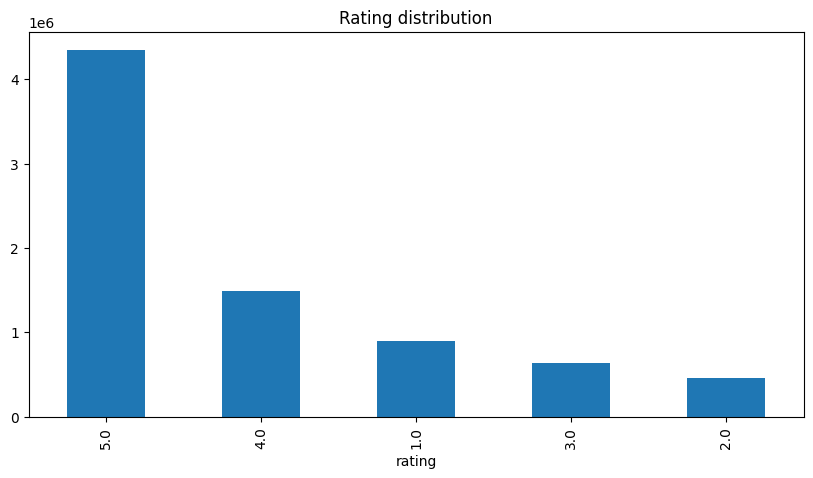

In [11]:
df['rating'].value_counts().plot.bar(title="Rating distribution",figsize=(10,5))

In [12]:
# Checking the number of unique users, products and category code in the df
print('Number of unique users = ', df['user_id'].nunique())
print('Number of unique products = ', df['product_id'].nunique())
print('Number of unique category code = ', df['category_code'].nunique())

Number of unique users =  4201696
Number of unique products =  476001
Number of unique category code =  126


In [13]:
# Most active users in terms of products rated
most_active = df.groupby('user_id').size().sort_values(ascending=False)
most_active.head(10)

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
dtype: int64

<AxesSubplot:xlabel='user_id'>

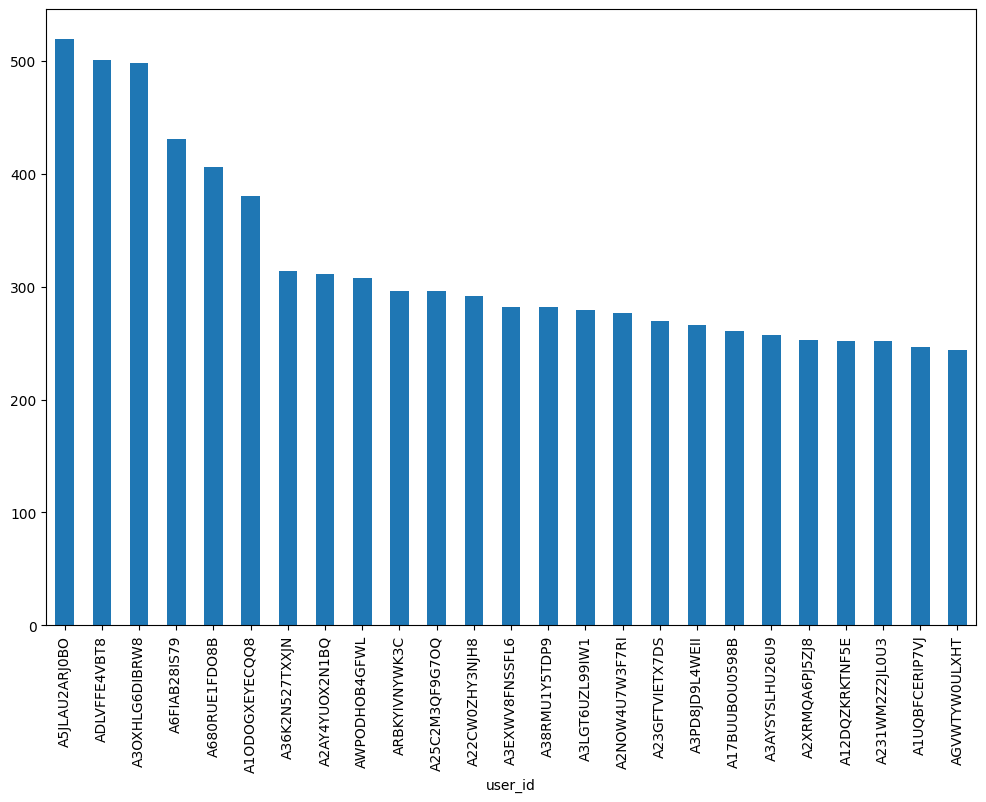

In [14]:
most_active.head(25).plot(kind = "bar",figsize=(12, 8))

<AxesSubplot:xlabel='product_id'>

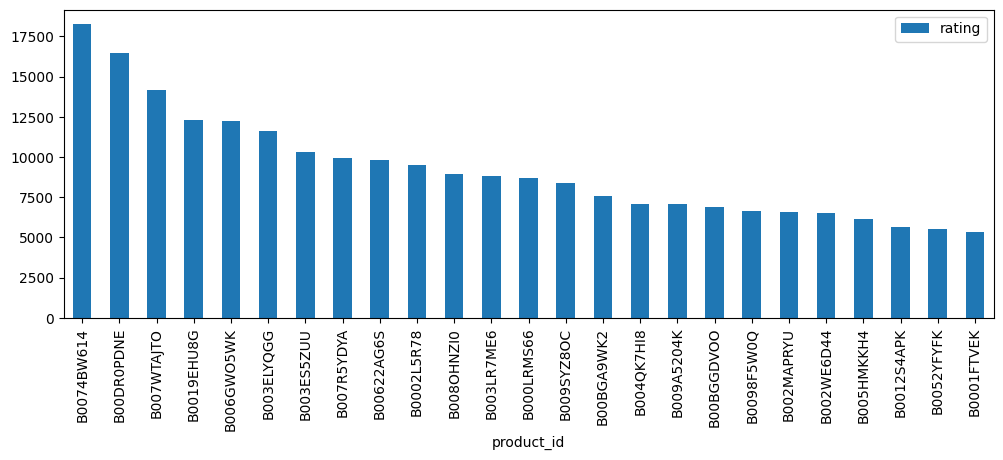

In [16]:
# Most top 25 products
popular_products = pd.DataFrame(df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(25).plot(kind = "bar",figsize=(12, 4))

<AxesSubplot:xlabel='category'>

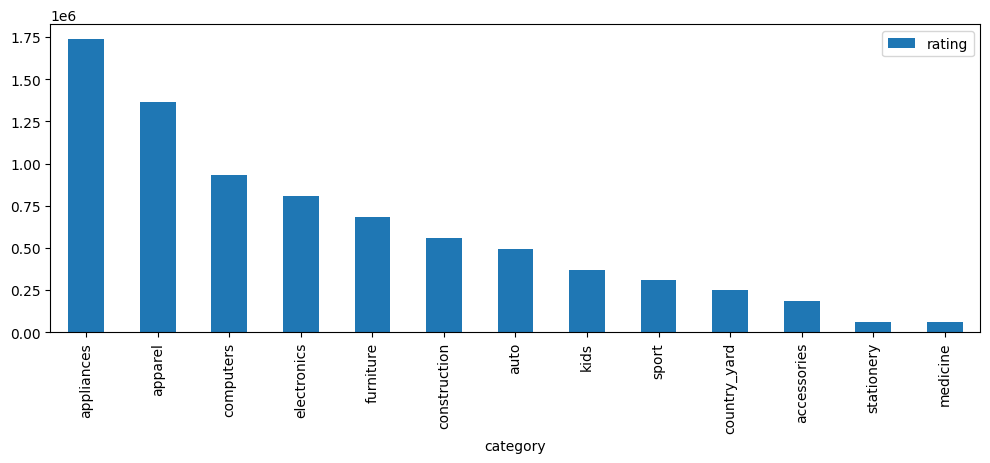

In [17]:
popular_categories = pd.DataFrame(df.groupby('category')['rating'].count())
most_popular_categories = popular_categories.sort_values('rating', ascending=False)
most_popular_categories.head(25).plot(kind = "bar",figsize=(12, 4))